In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
uber = pd.read_csv("uber-raw-data-janjune-15.csv", nrows=500000)

In [3]:
uber.head(2)

,Dispatching_base_num,Pickup_date,Affiliated_base_num,locationID
0,B02617,2015-05-17 09:47:00,B02617,141
1,B02617,2015-05-17 09:47:00,B02617,65


In [4]:
uber.shape

(500000, 4)

In [5]:
uber.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 4 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   Dispatching_base_num  500000 non-null  object
 1   Pickup_date           500000 non-null  object
 2   Affiliated_base_num   494357 non-null  object
 3   locationID            500000 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 15.3+ MB


In [6]:
uber['date_convert'] = pd.to_datetime(uber['Pickup_date'])

In [7]:
uber.head(2)

,Dispatching_base_num,Pickup_date,Affiliated_base_num,locationID,date_convert
0,B02617,2015-05-17 09:47:00,B02617,141,2015-05-17 09:47:00
1,B02617,2015-05-17 09:47:00,B02617,65,2015-05-17 09:47:00


In [8]:
uber.head(2)

,Dispatching_base_num,Pickup_date,Affiliated_base_num,locationID,date_convert
0,B02617,2015-05-17 09:47:00,B02617,141,2015-05-17 09:47:00
1,B02617,2015-05-17 09:47:00,B02617,65,2015-05-17 09:47:00


In [9]:
uber['Convert_Date'] = pd.to_datetime(uber['Pickup_date'])

In [10]:
uber.head(2)

,Dispatching_base_num,Pickup_date,Affiliated_base_num,locationID,date_convert,Convert_Date
0,B02617,2015-05-17 09:47:00,B02617,141,2015-05-17 09:47:00,2015-05-17 09:47:00
1,B02617,2015-05-17 09:47:00,B02617,65,2015-05-17 09:47:00,2015-05-17 09:47:00


In [11]:
uber.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 6 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   Dispatching_base_num  500000 non-null  object        
 1   Pickup_date           500000 non-null  object        
 2   Affiliated_base_num   494357 non-null  object        
 3   locationID            500000 non-null  int64         
 4   date_convert          500000 non-null  datetime64[ns]
 5   Convert_Date          500000 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(3)
memory usage: 22.9+ MB


In [12]:
uber['Year'] = uber['Convert_Date'].dt.year
uber['Month'] = uber['Convert_Date'].dt.month
uber['Day'] = uber['Convert_Date'].dt.day
uber['weekday'] = uber['Convert_Date'].dt.day_name()
uber['Hour'] = uber['Convert_Date'].dt.hour
uber['Minutes'] = uber['Convert_Date'].dt.minute

In [13]:
uber.head(2)

,Dispatching_base_num,Pickup_date,Affiliated_base_num,locationID,date_convert,Convert_Date,Year,Month,Day,weekday,Hour,Minutes
0,B02617,2015-05-17 09:47:00,B02617,141,2015-05-17 09:47:00,2015-05-17 09:47:00,2015,5,17,Sunday,9,47
1,B02617,2015-05-17 09:47:00,B02617,65,2015-05-17 09:47:00,2015-05-17 09:47:00,2015,5,17,Sunday,9,47


In [14]:
uber.duplicated().sum()

32977

In [15]:
uber.drop_duplicates(inplace=True)

In [16]:
uber.head(2)

,Dispatching_base_num,Pickup_date,Affiliated_base_num,locationID,date_convert,Convert_Date,Year,Month,Day,weekday,Hour,Minutes
0,B02617,2015-05-17 09:47:00,B02617,141,2015-05-17 09:47:00,2015-05-17 09:47:00,2015,5,17,Sunday,9,47
1,B02617,2015-05-17 09:47:00,B02617,65,2015-05-17 09:47:00,2015-05-17 09:47:00,2015,5,17,Sunday,9,47


<AxesSubplot:>

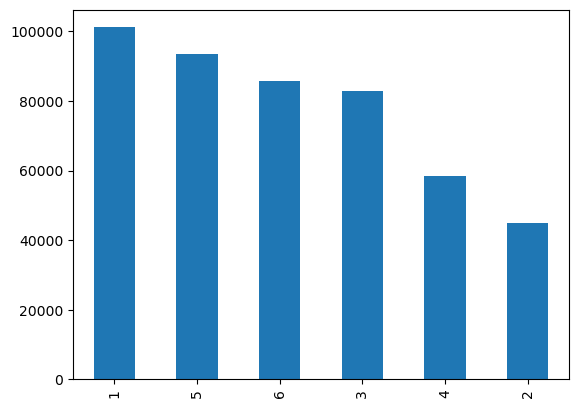

In [17]:
uber['Month'].value_counts().plot(kind='bar')

In [18]:
temp = uber.groupby(['Month', 'weekday'], as_index=False).size()

In [19]:
month = { 1 : 'Jan', 2 : 'Feb', 3 : 'Mar', 4 : 'Apr', 5 : 'May', 6 : 'June' }

In [20]:
temp['Month']  = temp['Month'].map(month)

In [21]:
temp.head(2)

,Month,weekday,size
0,Jan,Friday,12260
1,Jan,Monday,15460


<AxesSubplot:xlabel='Month', ylabel='size'>

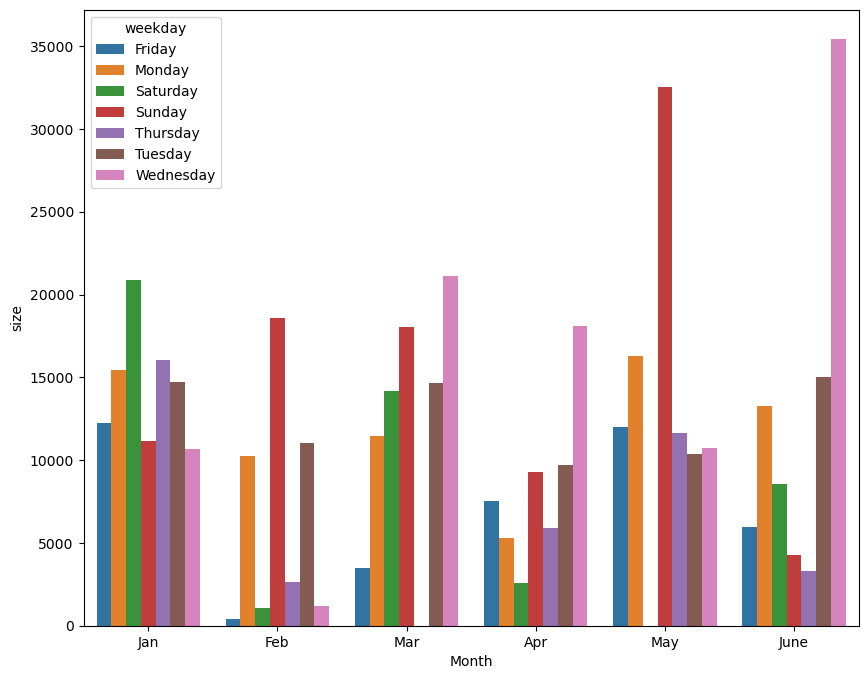

In [22]:
plt.figure(figsize=(10,8))
sns.barplot(x='Month', y='size', hue='weekday', data=temp)

In [23]:
uber.head(2)

,Dispatching_base_num,Pickup_date,Affiliated_base_num,locationID,date_convert,Convert_Date,Year,Month,Day,weekday,Hour,Minutes
0,B02617,2015-05-17 09:47:00,B02617,141,2015-05-17 09:47:00,2015-05-17 09:47:00,2015,5,17,Sunday,9,47
1,B02617,2015-05-17 09:47:00,B02617,65,2015-05-17 09:47:00,2015-05-17 09:47:00,2015,5,17,Sunday,9,47


In [24]:
temp_hour = uber.groupby(['weekday', 'Hour'], as_index=False).size()

In [25]:
temp_hour

,weekday,Hour,size
0,Friday,0,992
1,Friday,1,198
2,Friday,2,119
3,Friday,3,77
4,Friday,4,108
...,...,...,...
163,Wednesday,19,4088
164,Wednesday,20,3151
165,Wednesday,21,1600
166,Wednesday,22,1394


<AxesSubplot:xlabel='Hour', ylabel='size'>

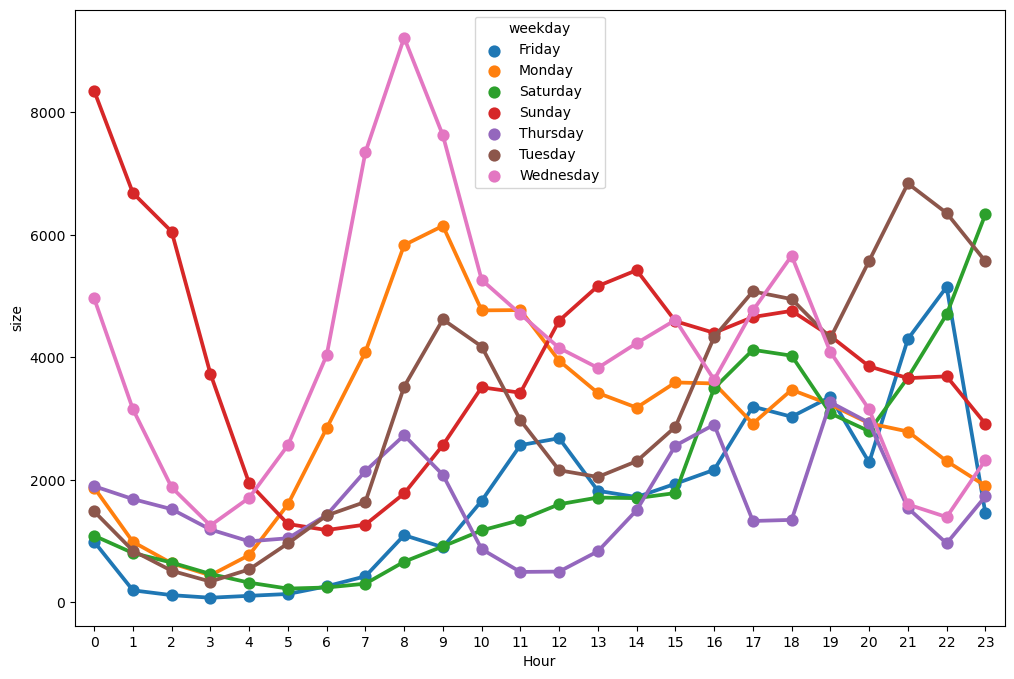

In [26]:
plt.figure(figsize=(12,8))
sns.pointplot(x='Hour', y='size', hue='weekday', data=temp_hour)

In [27]:
uber.head(2)

,Dispatching_base_num,Pickup_date,Affiliated_base_num,locationID,date_convert,Convert_Date,Year,Month,Day,weekday,Hour,Minutes
0,B02617,2015-05-17 09:47:00,B02617,141,2015-05-17 09:47:00,2015-05-17 09:47:00,2015,5,17,Sunday,9,47
1,B02617,2015-05-17 09:47:00,B02617,65,2015-05-17 09:47:00,2015-05-17 09:47:00,2015,5,17,Sunday,9,47


In [28]:
temp_base = uber.groupby(['Dispatching_base_num', 'Affiliated_base_num'], as_index=False).size()

In [29]:
temp_base.head(2)

,Dispatching_base_num,Affiliated_base_num,size
0,B02598,B00013,38
1,B02598,B00014,50


<AxesSubplot:xlabel='Dispatching_base_num', ylabel='size'>

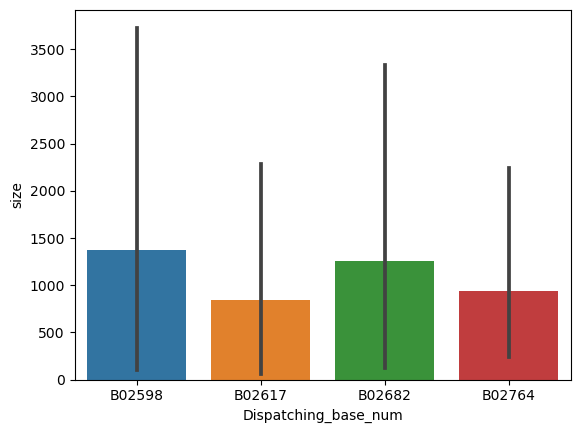

In [30]:
sns.barplot(x='Dispatching_base_num', y='size', data=temp_base)

In [31]:
foil = pd.read_csv('Uber-Jan-Feb-FOIL.csv')

In [32]:
foil.head(2)

,dispatching_base_number,date,active_vehicles,trips
0,B02512,1/1/2015,190,1132
1,B02765,1/1/2015,225,1765


In [34]:
foil['dispatching_base_number'].value_counts()

B02512    59
B02765    59
B02764    59
B02682    59
B02617    59
B02598    59
Name: dispatching_base_number, dtype: int64

In [35]:
uber.head(2)

,Dispatching_base_num,Pickup_date,Affiliated_base_num,locationID,date_convert,Convert_Date,Year,Month,Day,weekday,Hour,Minutes
0,B02617,2015-05-17 09:47:00,B02617,141,2015-05-17 09:47:00,2015-05-17 09:47:00,2015,5,17,Sunday,9,47
1,B02617,2015-05-17 09:47:00,B02617,65,2015-05-17 09:47:00,2015-05-17 09:47:00,2015,5,17,Sunday,9,47


In [36]:
uber['Dispatching_base_num'].value_counts()

B02764    231112
B02682    130444
B02598     62648
B02617     42819
Name: Dispatching_base_num, dtype: int64

In [66]:
#!pip install chart_studio

In [67]:
#!pip install plotly

In [68]:
import chart_studio.plotly as py
import plotly.graph_objs as go
import plotly.express as px
from plotly.offline import download_plotlyjs, plot, iplot, init_notebook_note
init_notebook_note(connected=True)

ImportError: cannot import name 'init_notebook_note' from 'plotly.offline' (C:\Users\grainstudio\anaconda33\lib\site-packages\plotly\offline\__init__.py)

In [40]:
foil.head(2)

,dispatching_base_number,date,active_vehicles,trips
0,B02512,1/1/2015,190,1132
1,B02765,1/1/2015,225,1765


<AxesSubplot:title={'center':'Analysis'}, xlabel='dispatching_base_number', ylabel='active_vehicles'>

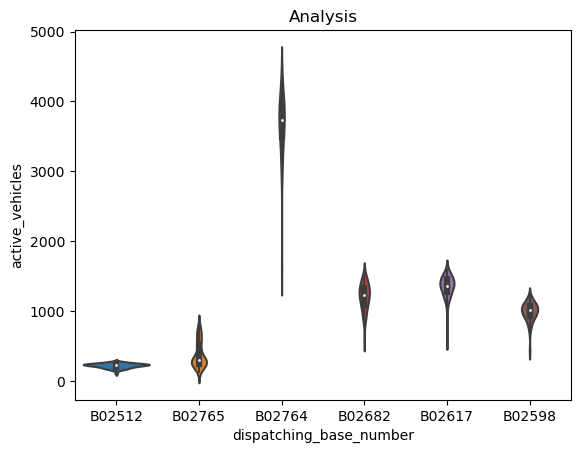

In [41]:
plt.title("Analysis")
sns.violinplot(x='dispatching_base_number', y="active_vehicles", data=foil)

In [42]:
import os

In [43]:
files = os.listdir(r"C:\Users\grainstudio\Desktop\udemy Data Analysis\uber_files\uber-pickups-in-new-york-city")[-7:]

In [44]:
files.remove('uber-raw-data-janjune-15.csv')

In [45]:
files

['uber-raw-data-apr14.csv',
 'uber-raw-data-aug14.csv',
 'uber-raw-data-jul14.csv',
 'uber-raw-data-jun14.csv',
 'uber-raw-data-may14.csv',
 'uber-raw-data-sep14.csv']

In [46]:
path = r"C:\Users\grainstudio\Desktop\udemy Data Analysis\uber_files\uber-pickups-in-new-york-city"

final=pd.DataFrame()
for file in files:
    current_df = pd.read_csv(path+'/'+file, encoding='utf-8')
    final = pd.concat([current_df, final])

In [47]:
final.shape

(4534327, 4)

In [48]:
final.head(2)

,Date/Time,Lat,Lon,Base
0,9/1/2014 0:01:00,40.2201,-74.0021,B02512
1,9/1/2014 0:01:00,40.7500,-74.0027,B02512


In [49]:
final.duplicated().sum()

82581

In [50]:
final.drop_duplicates(inplace=True)

In [51]:
final.shape

(4451746, 4)

In [52]:
import os

In [53]:
files = os.listdir(r"C:\Users\grainstudio\Desktop\udemy Data Analysis\uber_files\uber-pickups-in-new-york-city")[-7:]

In [54]:
files.remove('uber-raw-data-janjune-15.csv')

In [55]:
files

['uber-raw-data-apr14.csv',
 'uber-raw-data-aug14.csv',
 'uber-raw-data-jul14.csv',
 'uber-raw-data-jun14.csv',
 'uber-raw-data-may14.csv',
 'uber-raw-data-sep14.csv']

In [56]:
path= r"C:\Users\grainstudio\Desktop\udemy Data Analysis\uber_files\uber-pickups-in-new-york-city"

final = pd.DataFrame()

for file in files:
    current_df = pd.read_csv(path+'/'+file)
    final = pd.concat([current_df, final])

In [57]:
final.shape

(4534327, 4)

In [58]:
final.duplicated().sum()

82581

In [59]:
final.drop_duplicates(inplace=True)

In [60]:
final.isna().sum()

Date/Time    0
Lat          0
Lon          0
Base         0
dtype: int64

In [61]:
final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4451746 entries, 0 to 564515
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   Date/Time  object 
 1   Lat        float64
 2   Lon        float64
 3   Base       object 
dtypes: float64(2), object(2)
memory usage: 169.8+ MB


In [64]:
final.to_csv("moreData1.csv", index=False)